# Praca inżynierska

> Autor: Mateusz Woźniak


Projekt to model uczenia maszynowego, który rozpoznaje typ komórki na podstawie zdjęcia rozmazu szpiku kostnego.

Zbiór danych: https://www.kaggle.com/datasets/andrewmvd/bone-marrow-cell-classification/


In [3]:
import os
import matplotlib.pyplot as plt
import latextable
import texttable

names = {
    'ABE': 'Nieprawidłowy eozynofil',
    'ART': 'Artefakt',
    'BAS': 'Bazofil',
    'BLA': 'Blast',
    'EBO': 'Erytroblast',
    'EOS': 'Eozynofil',
    'FGC': 'Fagocyt',
    'HAC': 'Włochata komórka',
    'KSC': 'Cienie komórkowe',
    'LYI': 'Niedojrzały limfocyt',
    'LYT': 'Limfocyt',
    'MMZ': 'Metamielocyt',
    'MON': 'Monocyt',
    'MYB': 'Mielocyt',
    'NGB': 'Krwinka biała pałeczkowata',
    'NGS': 'Segmentowany neutrofil',
    'NIF': 'Brak rozpoznania',
    'OTH': 'Inna komórka',
    'PEB': 'Proerytroblast',
    'PLM': 'Komórka plazmatyczna',
    'PMO': 'Promielocyt',
}
    

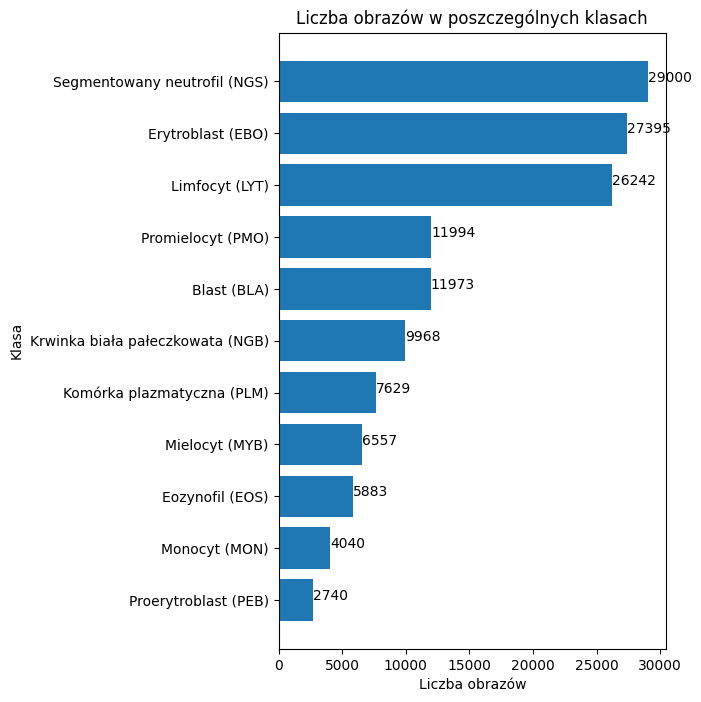

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|}
			\hline
			Klasa & Nazwa & Liczba obrazów \\
			\hline
			NGS & Segmentowany neutrofil & 29000 \\
			\hline
			EBO & Erytroblast & 27395 \\
			\hline
			LYT & Limfocyt & 26242 \\
			\hline
			PMO & Promielocyt & 11994 \\
			\hline
			BLA & Blast & 11973 \\
			\hline
			NGB & Krwinka biała pałeczkowata & 9968 \\
			\hline
			PLM & Komórka plazmatyczna & 7629 \\
			\hline
			MYB & Mielocyt & 6557 \\
			\hline
			EOS & Eozynofil & 5883 \\
			\hline
			MON & Monocyt & 4040 \\
			\hline
			PEB & Proerytroblast & 2740 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{Klasy obrazów w zbiorze danych}
	\label{tab:images_count}
\end{table}


In [19]:
CLASSES = [
    'NGS',
    'EBO',
    'LYT',
    'PMO',
    'BLA',
    'NGB',
    'PLM',
    'MYB',
    'EOS',
    'MON',
    'PEB'
]

def count_images():
    cwd = os.getcwd()
    dataset_dir = os.path.join(cwd, "dataset")
    subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    counts = {}
    for subdir in subdirs:
        if subdir not in CLASSES:
            continue
        subdir_path = os.path.join(dataset_dir, subdir)
        counts[subdir] = sum([len(files) for r, d, files in os.walk(subdir_path)])
        
    return counts

rows = []

def plot_counts(counts):
    key_names = list(map(lambda x: names[x] + ' (' + x + ')', counts.keys()))
    plt.figure(figsize=(5, 8))
    plt.barh(key_names, counts.values())
    for i in range(len(counts)):
        plt.text(list(counts.values())[i], i, str(list(counts.values())[i]))
    plt.title("Liczba obrazów w poszczególnych klasach")
    plt.xlabel("Liczba obrazów")
    plt.ylabel("Klasa")
    plt.savefig("images_count.eps", bbox_inches="tight", format='eps')
    plt.show()

counts = count_images()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
plot_counts(counts)

rows.append(["Klasa", "Nazwa", "Liczba obrazów"])

for key, value in reversed(counts.items()):
    rows.append([key, names[key], value])

table = texttable.Texttable()
table.add_rows(rows)
print(latextable.draw_latex(table, caption="Klasy obrazów w zbiorze danych", label="tab:images_count"))

{'PEB': 2740, 'MON': 4040, 'EOS': 5883, 'MYB': 6557, 'PLM': 7629, 'NGB': 9968, 'BLA': 11973, 'PMO': 11994, 'LYT': 26242, 'EBO': 27395, 'NGS': 29000}


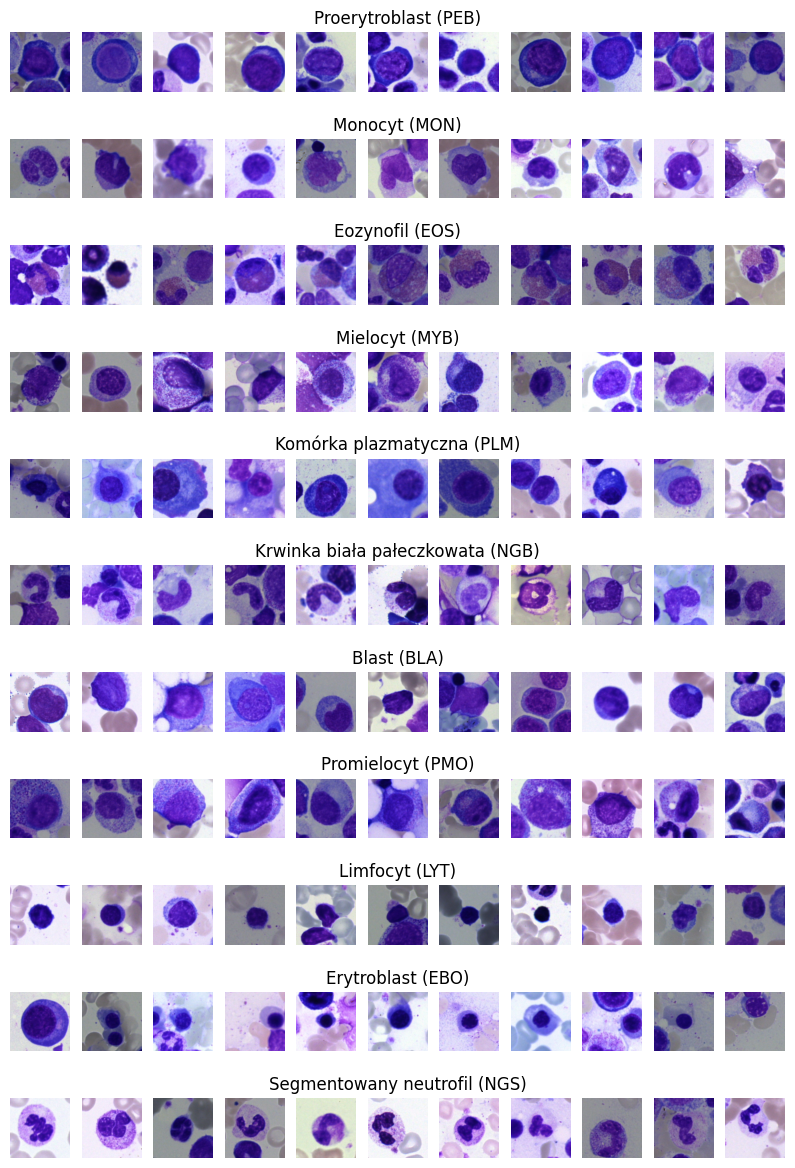

In [25]:
print(counts)
fig, ax = plt.subplots(len(counts), 11, figsize=(10, 15))
for key in counts:
    if key not in CLASSES:
        continue 
    filenames = []
    for r, d, files in os.walk(os.path.join("dataset", key)):
        for file in files:
            filenames.append(os.path.join(r, file))
    for i in range(11):
        I = plt.imread(filenames[i])
        ax[list(counts.keys()).index(key), i].imshow(I)
        ax[list(counts.keys()).index(key), i].axis('off')
        if i == 0:
            ax[list(counts.keys()).index(key), i+5].set_title(names[key] + f' ({key})')
plt.savefig("images_examples.eps", bbox_inches="tight", format='eps')

# counts1 = {'KSC': 42, 'FGC': 47, 'LYI': 65, 'OTH': 294,
#            'HAC': 409, 'BAS': 441, 'PEB': 2740, 'MMZ': 3055, 'MON': 4040, }
# counts2 = {
#     'EOS': 5883, 'MYB': 6557, 'PLM': 7629, 'NGB': 9968, 'BLA': 11973, 'PMO': 11994, 'ART': 19630, 'LYT': 26242, 'EBO': 27395, 'NGS': 29000}

# fig, ax = plt.subplots(10, 6, figsize=(10, 20))
# for key in counts1:
#     filenames = []
#     for r, d, files in os.walk(os.path.join("dataset", key)):
#         for file in files:
#             filenames.append(os.path.join(r, file))
#     for i in range(3):
#         I = plt.imread(filenames[i])
#         ax[list(counts1.keys()).index(key), i].imshow(I)
#         ax[list(counts1.keys()).index(key), i].axis('off')
#         if i == 0:
#             ax[list(counts1.keys()).index(key), i +
#                1].set_title(names[key] + f' ({key})')
# for key in counts2:
#     filenames = []
#     for r, d, files in os.walk(os.path.join("dataset", key)):
#         for file in files:
#             filenames.append(os.path.join(r, file))
#     for i in range(3):
#         I = plt.imread(filenames[i])
#         ax[list(counts2.keys()).index(key), i+3].imshow(I)
#         ax[list(counts2.keys()).index(key), i+3].axis('off')
#         if i == 0:
#             ax[list(counts2.keys()).index(key), i+1 +
#                3].set_title(names[key] + f' ({key})')
# plt.savefig("images_examples.eps", bbox_inches="tight", format='eps')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


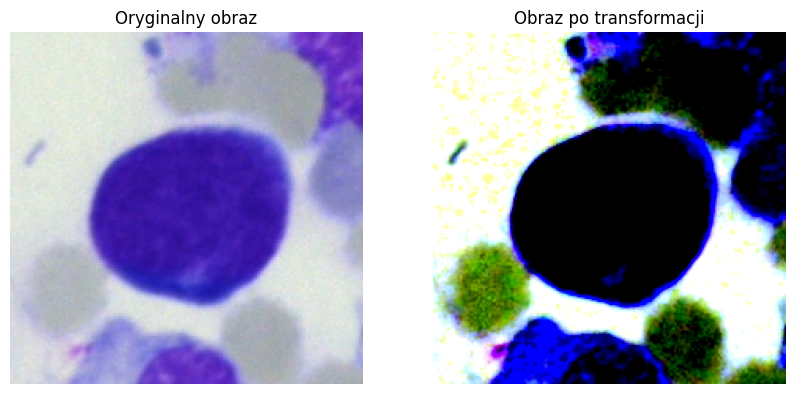

In [6]:
from torchvision import transforms
import cv2
import PIL
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ToPILImage(),
    transforms.RandomEqualize(1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
        0.229, 0.224, 0.225]),
])

I = cv2.imread("dataset/BLA/0001-1000/BLA_00001.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I = PIL.Image.fromarray(I)
transform(I)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(I, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Oryginalny obraz")
I = transform(I)
I = I.permute(1, 2, 0)
ax[1].imshow(I)
ax[1].axis('off')
ax[1].set_title("Obraz po transformacji")
plt.savefig("image_transform.eps", bbox_inches="tight", format='eps')


In [10]:
rows = [
    ["Architektura", "Ilość parametrów", "F1", "Wykresy funkcji błędu i F1", "Macierz pomyłek"],
    ["EfficientNet B0", "5.3M", "", "\\ref{fig:plot_efficientnet_b0}", "\\ref{fig:confusion_efficientnet_b0}"],
    ["EfficientNet B1", "7.8M", "", "\\ref{fig:plot_efficientnet_b1}", "\\ref{fig:confusion_efficientnet_b1}"],
    ["EfficientNet B2", "9.2M", "", "\\ref{fig:plot_efficientnet_b2}", "\\ref{fig:confusion_efficientnet_b2}"],
    ["EfficientNet B3", "12.0M", "0.87", "\\ref{fig:plot_efficientnet_b3}", "\\ref{fig:confusion_efficientnet_b3}"],
    ["EfficientNet B4", "19.0M", "", "\\ref{fig:plot_efficientnet_b4}", "\\ref{fig:confusion_efficientnet_b4}"],
    ["EfficientNet B5", "30.0M", "0.86", "\\ref{fig:plot_efficientnet_b5}", "\\ref{fig:confusion_efficientnet_b5}"],
    ["DenseNet121", "8.0M", "0.85", "\\ref{fig:plot_densenet121}", "\\ref{fig:confusion_densenet121}"],
    ["DenseNet169", "14.1M", "0.84", "\\ref{fig:plot_densenet169}", "\\ref{fig:confusion_densenet169}"],
    ["DenseNet201", "20.0M", "0.85", "\\ref{fig:plot_densenet201}", "\\ref{fig:confusion_densenet201}"],
    ["ResNet18", "11.7M", "0.84", "\\ref{fig:plot_resnet18}", "\\ref{fig:confusion_resnet18}"],
]

table = texttable.Texttable()
table.add_rows(rows)
print(latextable.draw_latex(
    table, caption="Porównanie jakości predykcji różnych architektur splotowych sieci neuronowych", label="tab:comparison"))


def print_f1_summary(input):
    rows = []
    rows.append(["Klasa", "Precyzja", "Czułość", "F1", "Liczba próbek"])
    for line in input.split("\n"):
        line = line.strip()
        if line == "":
            continue
        line = line.split()
        rows.append(line)
    table = texttable.Texttable()
    table.add_rows(rows)
    print(latextable.draw_latex(table, caption="Podsumowanie miary F1 dla poszczególnych klas", label="tab:f1_summary"))
    
print_f1_summary("""
         BLA       0.79      0.82      0.81      2350
         EBO       0.91      0.97      0.94      5568
         EOS       0.98      0.97      0.97      1180
         LYT       0.90      0.92      0.91      5273
         MON       0.84      0.57      0.68       796
         MYB       0.78      0.62      0.69      1301
         NGB       0.74      0.78      0.76      1983
         NGS       0.91      0.92      0.91      5823
         PEB       0.87      0.47      0.61       549
         PLM       0.96      0.79      0.87      1545
         PMO       0.79      0.89      0.84      2401""")

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|l|}
			\hline
			Architektura & Ilość parametrów & F1 & Wykresy funkcji błędu i F1 & Macierz pomyłek \\
			\hline
			EfficientNet B0 & 5.3M &  & \ref{fig:plot_efficientnet_b0} & \ref{fig:confusion_efficientnet_b0} \\
			\hline
			EfficientNet B1 & 7.8M &  & \ref{fig:plot_efficientnet_b1} & \ref{fig:confusion_efficientnet_b1} \\
			\hline
			EfficientNet B2 & 9.2M &  & \ref{fig:plot_efficientnet_b2} & \ref{fig:confusion_efficientnet_b2} \\
			\hline
			EfficientNet B3 & 12.0M & 0.870 & \ref{fig:plot_efficientnet_b3} & \ref{fig:confusion_efficientnet_b3} \\
			\hline
			EfficientNet B4 & 19.0M &  & \ref{fig:plot_efficientnet_b4} & \ref{fig:confusion_efficientnet_b4} \\
			\hline
			EfficientNet B5 & 30.0M & 0.860 & \ref{fig:plot_efficientnet_b5} & \ref{fig:confusion_efficientnet_b5} \\
			\hline
			DenseNet121 & 8.0M & 0.850 & \ref{fig:plot_densenet121} & \ref{fig:confusion_densenet121} \\
			\hline
			DenseNet169 & 14.1M & 0.840 &